In [52]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#  Load the dataset

data = pd.read_csv('Twitter_sentiment_analysis.csv')

In [54]:
#  Basic Data Exploration
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [55]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


In [56]:
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
clean_text    4
category      7
dtype: int64


In [57]:
# Remove rows where the target variable is NaN
data = data.dropna(subset=['category'])

In [58]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ''  # Return an empty string if the input is not a string
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+|#\S+', '', text, flags=re.MULTILINE)
    # Remove special characters, integers, and floating-point numbers
    text = re.sub(r'\d+(\.\d+)?', '', text)  # Remove integers and floating-point numbers
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the text column
data['cleaned_text'] = data['clean_text'].apply(preprocess_text)

In [59]:
#  Feature Engineering - Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

# Step 5: Define the target variable
y = data['category']

In [60]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#  Train a Machine Learning Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [62]:
#  Evaluate the Model
y_pred = model.predict(X_test)


Accuracy Score:
0.7277803344071176

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.71      0.61      0.66      7230
         0.0       0.87      0.60      0.71     10961
         1.0       0.68      0.88      0.77     14404

    accuracy                           0.73     32595
   macro avg       0.75      0.70      0.71     32595
weighted avg       0.75      0.73      0.72     32595


Confusion Matrix:


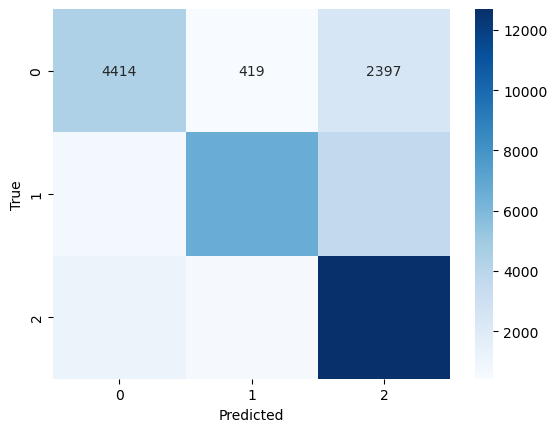

In [63]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


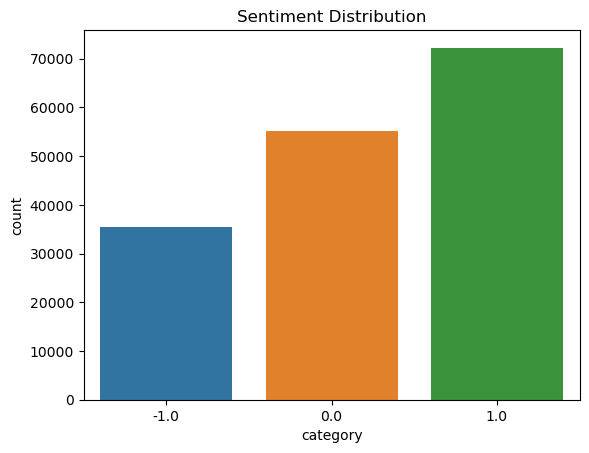

In [51]:
# Visualize Data 
sns.countplot(x='category', data=data)
plt.title('Sentiment Distribution')
plt.show()